In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.timeseries import LombScargle
from matplotlib import transforms
import lightkurve as lk
from astropy.modeling import models
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum
from pylab import rc
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']

In [2]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [3]:
fff = open("timeBM", "r")
timeBM = []
for x in fff:
    x = float(x)
    timeBM.append(x)
    
fff = open("timeRM", "r")
timeRM = []
for x in fff:
    x = float(x)
    timeRM.append(x)
    
fff = open("timeBJ", "r")
timeBJ = []
for x in fff:
    x = float(x)
    timeBJ.append(x)
    
fff = open("timeRJ", "r")
timeRJ = []
for x in fff:
    x = float(x)
    timeRJ.append(x)

In [4]:
lc = lk.search_lightcurvefile('GD356', sector=16).download().PDCSAP_FLUX.remove_nans()
sec16 = lc.flux
sec16t = lc.time
sec16e = lc.flux_err
print(lc.camera)
print(lc.ccd)
lc = lk.search_lightcurvefile('GD356', sector=23).download().PDCSAP_FLUX.remove_nans()
sec23 = lc.flux
sec23t = lc.time
sec23e = lc.flux_err
print(lc.camera)
print(lc.ccd)
lc = lk.search_lightcurvefile('GD356', sector=24).download().PDCSAP_FLUX.remove_nans()
sec24 = lc.flux
sec24t = lc.time
sec24e = lc.flux_err
print(lc.camera)
print(lc.ccd)
lc = lk.search_lightcurvefile('GD356', sector=25).download().PDCSAP_FLUX.remove_nans()
sec25 = lc.flux
sec25t = lc.time
sec25e = lc.flux_err
print(lc.camera)
print(lc.ccd)
lc = lk.search_lightcurvefile('GD356', sector=26).download().PDCSAP_FLUX.remove_nans()
sec26 = lc.flux
sec26t = lc.time
sec26e = lc.flux_err
print('26 ', lc.camera)
print(lc.ccd)


sec16e = sec16e/np.mean(sec16)
sec23e = sec23e/np.mean(sec23)
sec24e = sec24e/np.mean(sec24)
sec25e = sec25e/np.mean(sec25)
sec26e = sec26e/np.mean(sec26)
sec16 = (sec16/np.mean(sec16))-1
sec23 = (sec23/np.mean(sec23))-1
sec24 = (sec24/np.mean(sec24))-1
sec25 = (sec25/np.mean(sec25))-1
sec26 = (sec26/np.mean(sec26))-1

sec16t = sec16t + 2457000
sec23t = sec23t + 2457000
sec24t = sec24t + 2457000
sec25t = sec25t + 2457000
sec26t = sec26t + 2457000

TESSStackPhot = np.append(sec16, sec23)
TESSStackPhot = np.append(TESSStackPhot, sec24)
TESSStackPhot = np.append(TESSStackPhot, sec25)
TESSStackPhot = np.append(TESSStackPhot, sec26)
TESSStackTime = np.append(sec16t, sec23t)
TESSStackTime = np.append(TESSStackTime, sec24t)
TESSStackTime = np.append(TESSStackTime, sec25t)
TESSStackTime = np.append(TESSStackTime, sec26t)
TESSStackErr = np.append(sec16e, sec23e)
TESSStackErr = np.append(TESSStackErr, sec24e)
TESSStackErr = np.append(TESSStackErr, sec25e)
TESSStackErr = np.append(TESSStackErr, sec26e)
BJEWs = np.load('EWs/BJEWs.npy')
BJEWsErr = np.load('EWs/BJEWsErr.npy')

BMEWs = np.load('EWs/BMEWs.npy')
BMEWsErr = np.load('EWs/BMEWsErr.npy')

RJEWs = np.load('EWs/RJEWs.npy')
RJEWsErr = np.load('EWs/RJEWsErr.npy')

RMEWs = np.load('EWs/RMEWs.npy')
RMEWsErr = np.load('EWs/RMEWsErr.npy')

fullWHTSTackTJ = np.append(timeBJ, timeRJ)
fullWHTSTackTM = np.append(timeBM, timeRM)


fullWHTSTackFJ = np.append(BJEWs, RJEWs)
fullWHTSTackFM = np.append(BMEWs, RMEWs)


fullWHTSTackEJ = np.append(BJEWsErr, RJEWsErr)
fullWHTSTackEM = np.append(BMEWsErr, RMEWsErr)


#model = 0.00619304762*np.sin(TESSStackTime*(2*np.pi*12.453593)+0.134084) + 1
#noise = np.mean(np.abs(TESSStackPhot-model))
#print(1/noise) # <= TESS SNR

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!
3
4
3
3
2
1
2
2
26  2
2


In [5]:
RJSMVelocity = np.load('RJSMV.npy')
RJSMVelocityError = np.load('RJSMVe.npy')
RMSMVelocity = np.load('RMSMV.npy')
RMSMVelocityError = np.load('RMSMVe.npy')

RJSMVelocity = (RJSMVelocity*6562.801/299792.458)+6562.801
RJSMVelocityError = (RJSMVelocityError*6562.801/299792.458)
RMSMVelocity = (RMSMVelocity*6562.801/299792.458)+6562.801
RMSMVelocityError = (RMSMVelocityError*6562.801/299792.458)

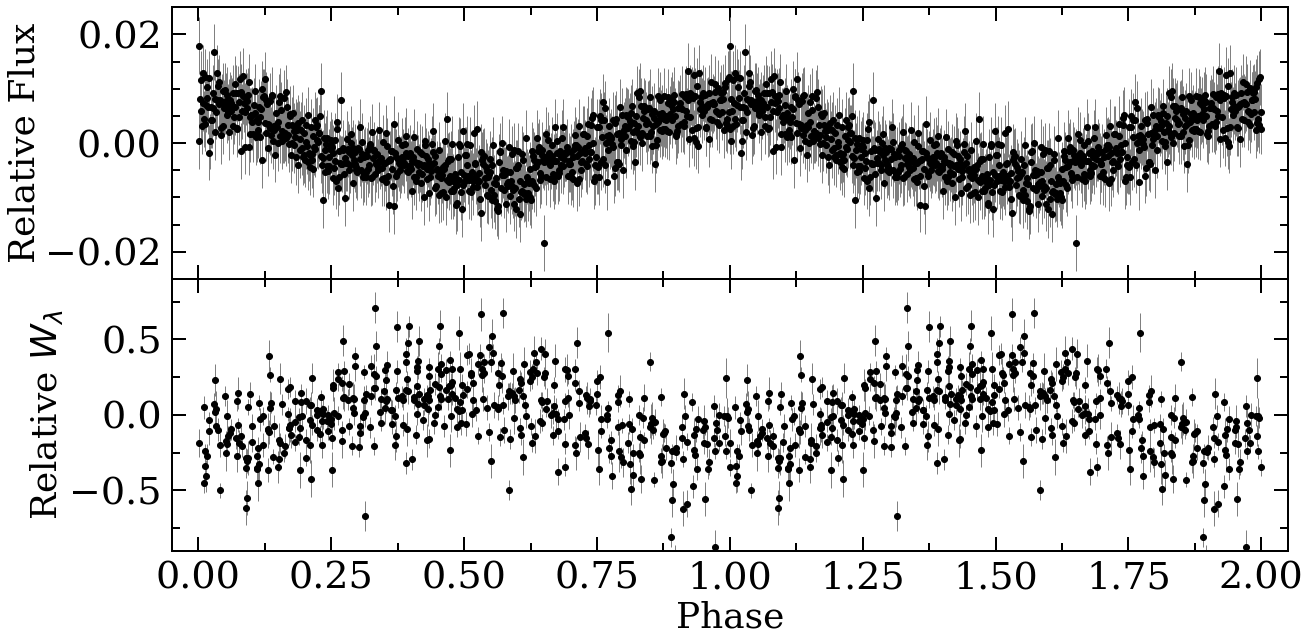

In [6]:
from pylab import rc
rc('axes', linewidth=2)
fig, axs = plt.subplots(2, 1,
                        gridspec_kw={'hspace': 0., 'wspace': 0}, figsize=(20,10))
TESStackTimeAdj = TESSStackTime-2457000.- 1296.0255697684468
TessPhases = foldMeth(TESStackTimeAdj,  0.08029820145279275)
sortIndi = np.argsort(TessPhases)
TessPhases = TessPhases[sortIndi]
TESSStackPhotS = TESSStackPhot[sortIndi]
TESSStackErrS = TESSStackErr[sortIndi]

TESSStackPhotMean = np.nanmean(np.pad(TESSStackPhotS.astype(float), (0, 100 - TESSStackPhotS.size%100), mode='constant', constant_values=np.NaN).reshape(-1, 100), axis=1)
TessPhasesMean = np.nanmean(np.pad(TessPhases.astype(float), (0, 100 - TessPhases.size%100), mode='constant', constant_values=np.NaN).reshape(-1, 100), axis=1)
TESSStackErrSMean = np.nanmean(np.pad(TESSStackErrS.astype(float), (0, 100 - TESSStackErrS.size%100), mode='constant', constant_values=np.NaN).reshape(-1, 100), axis=1)
TESSStackErrSMean = TESSStackErrSMean/np.sqrt(100)

axs[0].errorbar(TessPhasesMean, TESSStackPhotMean, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(TessPhasesMean+1, TESSStackPhotMean, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
fullWHTSTackTJAdj = fullWHTSTackTJ-2457000- 1296.0255697684468
fullWHTSTackPhaseJ = foldMeth(fullWHTSTackTJAdj,  0.08029820145279275)
sortIndi = np.argsort(fullWHTSTackPhaseJ)
fullWHTSTackPhaseJ = fullWHTSTackPhaseJ[sortIndi]
fullWHTSTackFSJ = fullWHTSTackFJ[sortIndi]
fullWHTSTackESJ = fullWHTSTackEJ[sortIndi]
fullWHTSTackTMAdj = fullWHTSTackTM - 2457000- 1296.0255697684468
fullWHTSTackPhaseM = foldMeth(fullWHTSTackTMAdj, 0.08029820145279275)
sortIndi = np.argsort(fullWHTSTackPhaseM)
fullWHTSTackPhaseM = fullWHTSTackPhaseM[sortIndi]
fullWHTSTackFSM = fullWHTSTackFM[sortIndi]
fullWHTSTackESM = fullWHTSTackEM[sortIndi]
axs[1].errorbar(fullWHTSTackPhaseM, fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(fullWHTSTackPhaseJ, fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(fullWHTSTackPhaseM+1, fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(fullWHTSTackPhaseJ+1, fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')



timeRJAdj = np.array(timeRJ)-2457000 - 1296.0255697684468
WHTVelocityPhaseJ = foldMeth(timeRJAdj,  0.08029820145279275)
sortIndi = np.argsort(WHTVelocityPhaseJ)
WHTVelocityPhaseJ = WHTVelocityPhaseJ[sortIndi]
RJSMVelocityS = RJSMVelocity[sortIndi]
RJSMVelocityErrorS = RJSMVelocityError[sortIndi]
timeRMAdj = np.array(timeRM)-2457000 - 1296.0255697684468
WHTVelocityPhaseM = foldMeth(timeRMAdj,  0.08029820145279275)
sortIndi = np.argsort(WHTVelocityPhaseM)
WHTVelocityPhaseM = WHTVelocityPhaseM[sortIndi]
RMSMVelocityS = RMSMVelocity[sortIndi]
RMSMVelocityErrorS = RMSMVelocityError[sortIndi]
#axs[2].errorbar(WHTVelocityPhaseM, RMSMVelocityS, yerr=RMSMVelocityErrorS, c='r', lw=1, marker='o',ecolor='grey', ls = '')
#axs[2].errorbar(WHTVelocityPhaseJ, RJSMVelocityS, yerr=RJSMVelocityErrorS, c='b', lw=1, marker='o',ecolor='grey', ls = '')
#axs[2].errorbar(WHTVelocityPhaseM+1, RMSMVelocityS, yerr=RMSMVelocityErrorS, c='r', lw=1, marker='o',ecolor='grey', ls = '')
#axs[2].errorbar(WHTVelocityPhaseJ+1, RJSMVelocityS, yerr=RJSMVelocityErrorS, c='b', lw=1, marker='o',ecolor='grey', ls = '')
MayKeep2019 = [WHTVelocityPhaseM, RMSMVelocityS, RMSMVelocityErrorS]

xlimits = axs[0].set_xlim()
axs[0].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='k', lw=1, marker='o',ecolor='grey', ls = '', label='TESS')
axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='k', lw=1, marker='o',ecolor='grey', ls = '', label='WHT')
#axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='k', lw=1, marker='o',ecolor='grey', ls = '', label='2018 Jul')



axs[0].set_xlim(xlimits)


#axs[0].legend(prop={'size': 30})
#axs[1].legend(prop={'size': 30},loc='upper right')
#axs[2].legend(prop={'size': 30})
axs[1].set_xlabel("Phase", fontsize=36)
axs[0].set_ylabel('Relative Flux', fontsize=36)
axs[1].set_ylabel(r'Relative $W_\lambda$', fontsize=36)
#axs[2].set_ylabel(r'Central Wavelength (Å)', fontsize=36)
#ax.xaxis.set_label_coords(1.0, -0.1)
#ax.set_xlim(0,1)
#ax2.set_xlim(6250,7200)

#ax.set_ylim(0.9,1.12)
axs[0].set_ylim(-0.025,0.025)
axs[0].set_xlim(-0.05,2.05)
axs[1].set_xlim(-0.05,2.05)
#axs[2].set_xlim(-0.05,2.05)
axs[1].set_ylim(-0.9,0.9)
#axs[2].set_ylim(6315,6375)


#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.tick_params(labelright='on')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")


#ax.set_yticks(np.arange(0.9, 1.12, 0.05))
#ax2.set_yticks(np.arange(0.9, 1.12, 0.05))
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
#axs[2].yaxis.set_major_locator(MultipleLocator(20))
#ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
axs[0].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.005))
axs[1].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.25))
#axs[2].xaxis.set_minor_locator(MultipleLocator(0.125))
#axs[2].yaxis.set_minor_locator(MultipleLocator(5))
axs[0].tick_params(which='minor', length=8,direction="in")
axs[1].tick_params(which='minor', length=8,direction="in")
#axs[2].tick_params(which='minor', length=8,direction="in")
axs[0].tick_params(which='both', width=2,direction='in',pad=10)
axs[1].tick_params(which='both', width=2,direction='in',pad=10)
#axs[2].tick_params(which='both', width=2,direction='in',pad=10)
axs[0].tick_params(which='major', length=14,direction='in')
axs[1].tick_params(which='major', length=14,direction='in')
#axs[2].tick_params(which='major', length=14,direction='in')
axs[0].set_xticklabels([])
#axs[1].set_xticklabels([])
#ax.tick_params(which='minor', length=8)
#ax2.tick_params(which='both', width=4)
#ax2.tick_params(which='major', length=14)
#ax2.tick_params(which='minor', length=8)
axs[0].tick_params(labelsize=38)
axs[1].tick_params(labelsize=38)
#axs[2].tick_params(labelsize=38)
axs[0].xaxis.set_ticks_position('both')
axs[1].xaxis.set_ticks_position('both')
#axs[2].xaxis.set_ticks_position('both')


axs[0].yaxis.set_ticks_position('both')
axs[1].yaxis.set_ticks_position('both')
#axs[2].yaxis.set_ticks_position('both')
#ax2.tick_params(labelsize=23)
bboxx = transforms.Bbox([[0.18, 0.1], [18.22, 8.85]])

#plt.savefig('PhotometryHSTv2.pdf',bbox_inches=bboxx)
#plt.savefig('Figure2Updated.eps', bbox_inches='tight', pad_inches=0.8) 
plt.show()

In [4]:
indata = np.loadtxt("dahe1252.dat", usecols=(0,1,2))
time1252 = indata[:,0]
flux1252 = indata[:,1]
error1252 = indata[:,2]

indata = np.loadtxt("dahe0035.dat", usecols=(0,1,2))
time0035 = indata[:,0]
flux0035 = indata[:,1]
error0035 = indata[:,2]

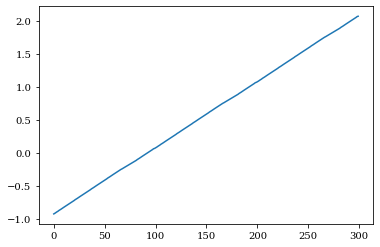

In [6]:
plt.plot(time1252)

In [9]:
bad0035 = np.argmin(flux0035)
flux0035[bad0035] = -999

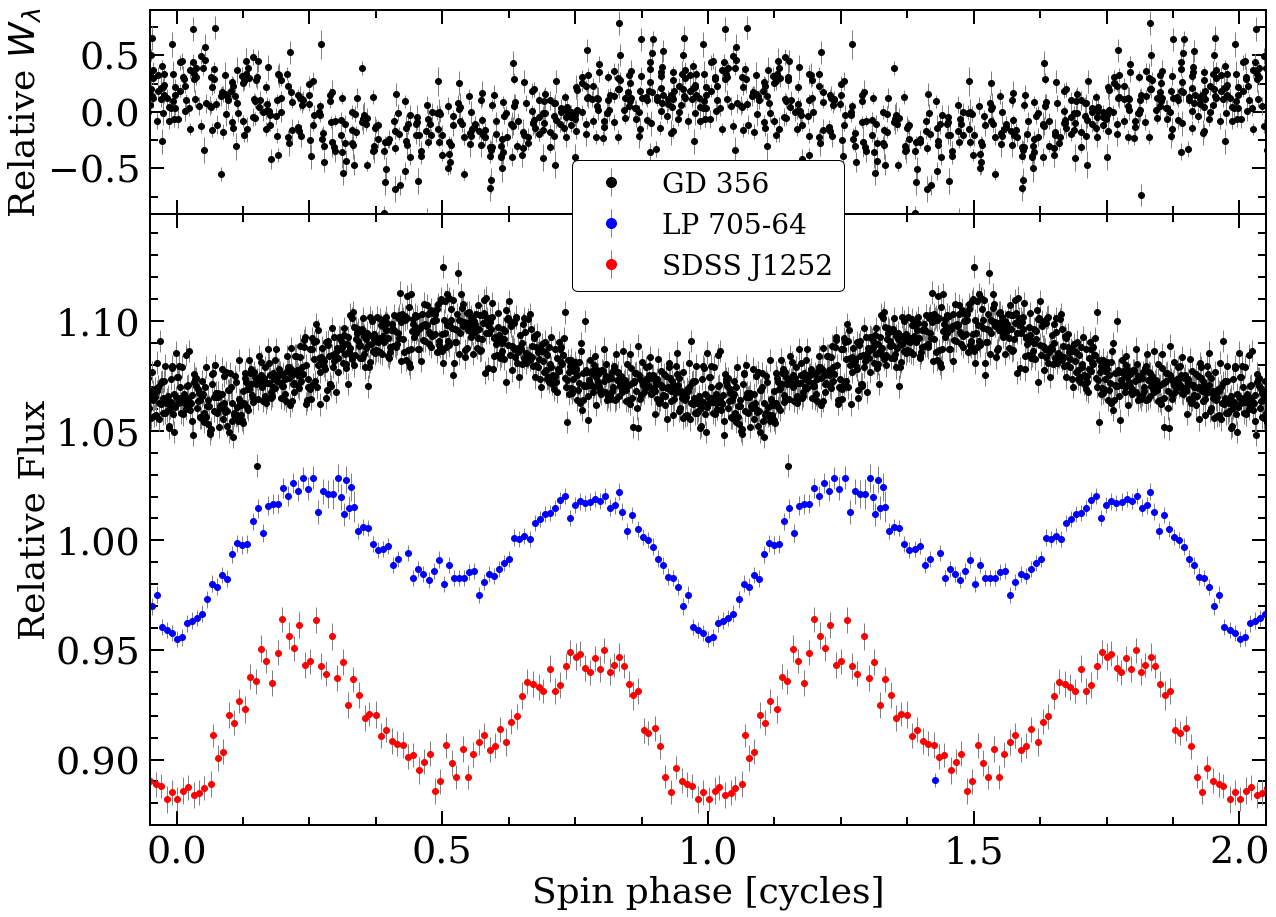

In [12]:
from pylab import rc
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rc('axes', linewidth=2)
fig, axs = plt.subplots(2, 1,
                        gridspec_kw={'hspace': 0., 'wspace': 0,'height_ratios': [1, 3]}, figsize=(20,15))
#phasePlot1252
offset = -0.235
offsetGlobal = 0.07
yoff = -0.08

axs[0].errorbar(fullWHTSTackPhaseM+0.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ+0.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseM+1.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ+1.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseM-0.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ-0.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')

#TESSStackPhotMean[badIndex] = -0.0025
axs[1].errorbar(TessPhasesMean+0.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(TessPhasesMean+1.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(TessPhasesMean-0.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')


axs[1].errorbar(time0035, flux0035+0.08, yerr=error0035, c='b', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(time1252, flux1252-0.08, yerr=error1252, c='r', lw=1, marker='o',ecolor='grey', ls = '')

xlimits = axs[1].set_xlim()
axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='k', lw=1, marker='o',ecolor='grey', ls = '', label='GD 356')
axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='b', lw=1, marker='o',ecolor='grey', ls = '', label='LP 705-64')

axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='r', lw=1, marker='o',ecolor='grey', ls = '', label='SDSS J1252')

axs[1].set_xlim(xlimits)


#axs[1][0].legend(prop={'size': 30})
#axs[1][1].legend(prop={'size': 30},loc='upper right')
#axs[1][2].legend(prop={'size': 30})
axs[1].set_xlabel("Spin phase [cycles]", fontsize=36)
axs[1].set_ylabel('Relative Flux', fontsize=36)

axs[1].set_ylim(0.87,1.149)
axs[1].set_xlim(-0.05,2.05)
axs[0].set_xlim(-0.05,2.05)
#axs[2].set_xlim(-0.05,2.05)
axs[0].set_ylim(-0.9,0.9)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())

axs[1].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.01))
axs[1].yaxis.set_major_locator(MultipleLocator(0.05))
axs[1].xaxis.set_major_locator(MultipleLocator(0.5))
axs[1].tick_params(which='minor', length=8,direction="in")

axs[1].tick_params(which='both', width=2,direction='in',pad=10)

axs[1].tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
axs[1].tick_params(labelsize=38)

axs[1].xaxis.set_ticks_position('both')
axs[1].yaxis.set_ticks_position('both')
axs[1].legend(prop={'size': 28}, loc='lower center',bbox_to_anchor=(0.0,0.85,1,1),framealpha=1,edgecolor='k')



axs[0].xaxis.set_minor_locator(AutoMinorLocator())

axs[0].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.25))
axs[0].tick_params(which='minor', length=8,direction="in")

axs[0].tick_params(which='both', width=2,direction='in',pad=10)

axs[0].tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
axs[0].tick_params(labelsize=38)

axs[0].xaxis.set_ticks_position('both')
axs[0].yaxis.set_ticks_position('both')

axs[0].set_xticklabels([])
axs[0].set_ylabel(r'Relative $W_\lambda$', fontsize=36)
bboxx = transforms.Bbox([[0.5, 0.66], [18.1, 13.3]])

#plt.savefig('12800LCv2.pdf',bbox_inches=bboxx)

plt.show()

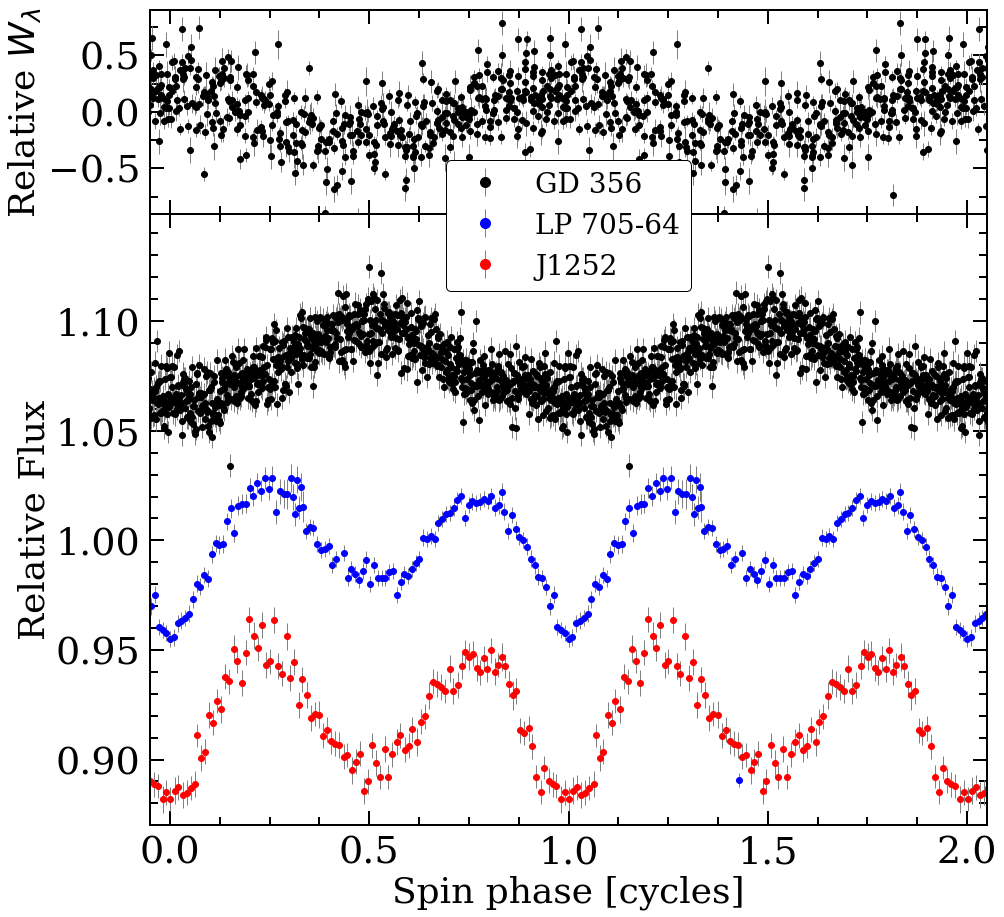

In [14]:
from pylab import rc
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rc('axes', linewidth=2)
fig, axs = plt.subplots(2, 1,
                        gridspec_kw={'hspace': 0., 'wspace': 0,'height_ratios': [1, 3]}, figsize=(15,15))
#phasePlot1252
offset = -0.235
offsetGlobal = 0.07
yoff = -0.08

axs[0].errorbar(fullWHTSTackPhaseM+0.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ+0.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseM+1.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ+1.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseM-0.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ-0.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')

#TESSStackPhotMean[badIndex] = -0.0025
axs[1].errorbar(TessPhasesMean+0.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(TessPhasesMean+1.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(TessPhasesMean-0.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')


axs[1].errorbar(time0035, flux0035+0.08, yerr=error0035, c='b', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(time1252, flux1252-0.08, yerr=error1252, c='r', lw=1, marker='o',ecolor='grey', ls = '')

xlimits = axs[1].set_xlim()
axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='k', lw=1, marker='o',ecolor='grey', ls = '', label='GD 356')
axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='b', lw=1, marker='o',ecolor='grey', ls = '', label='LP 705-64')

axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='r', lw=1, marker='o',ecolor='grey', ls = '', label='J1252')

axs[1].set_xlim(xlimits)


#axs[1][0].legend(prop={'size': 30})
#axs[1][1].legend(prop={'size': 30},loc='upper right')
#axs[1][2].legend(prop={'size': 30})
axs[1].set_xlabel("Spin phase [cycles]", fontsize=36)
axs[1].set_ylabel('Relative Flux', fontsize=36)

axs[1].set_ylim(0.87,1.149)
axs[1].set_xlim(-0.05,2.05)
axs[0].set_xlim(-0.05,2.05)
#axs[2].set_xlim(-0.05,2.05)
axs[0].set_ylim(-0.9,0.9)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())

axs[1].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.01))
axs[1].yaxis.set_major_locator(MultipleLocator(0.05))
axs[1].xaxis.set_major_locator(MultipleLocator(0.5))
axs[1].tick_params(which='minor', length=8,direction="in")

axs[1].tick_params(which='both', width=2,direction='in',pad=10)

axs[1].tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
axs[1].tick_params(labelsize=38)

axs[1].xaxis.set_ticks_position('both')
axs[1].yaxis.set_ticks_position('both')
axs[1].legend(prop={'size': 28}, loc='lower center',bbox_to_anchor=(0.0,0.85,1,1),framealpha=1,edgecolor='k')



axs[0].xaxis.set_minor_locator(AutoMinorLocator())

axs[0].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.25))
axs[0].tick_params(which='minor', length=8,direction="in")

axs[0].tick_params(which='both', width=2,direction='in',pad=10)

axs[0].tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
axs[0].tick_params(labelsize=38)

axs[0].xaxis.set_ticks_position('both')
axs[0].yaxis.set_ticks_position('both')

axs[0].set_xticklabels([])
axs[0].set_ylabel(r'Relative $W_\lambda$', fontsize=36)
bboxx = transforms.Bbox([[-0.15, 0.66], [13.7, 13.3]])

#plt.savefig('12800LCv3.pdf',bbox_inches=bboxx)

plt.show()

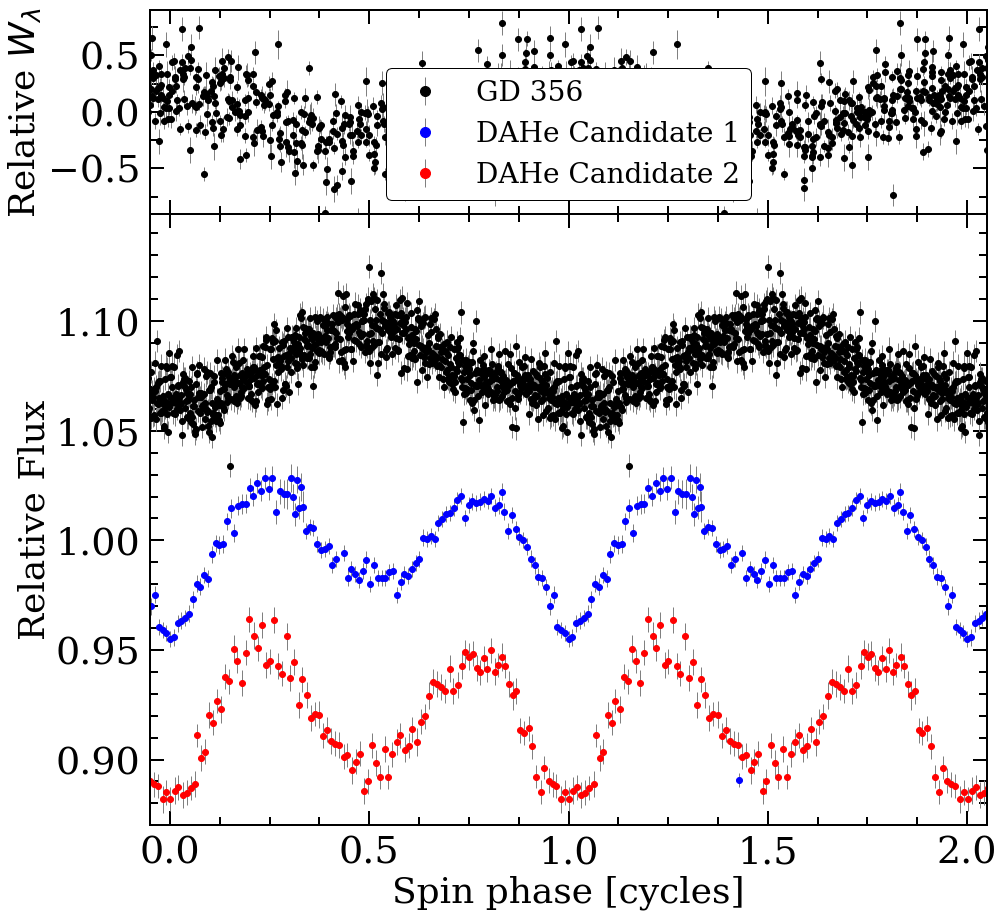

In [16]:
from pylab import rc
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rc('axes', linewidth=2)
fig, axs = plt.subplots(2, 1,
                        gridspec_kw={'hspace': 0., 'wspace': 0,'height_ratios': [1, 3]}, figsize=(15,15))
#phasePlot1252
offset = -0.235
offsetGlobal = 0.07
yoff = -0.08

axs[0].errorbar(fullWHTSTackPhaseM+0.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ+0.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseM+1.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ+1.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseM-0.5, 1.1*fullWHTSTackFSM, yerr=fullWHTSTackESM, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[0].errorbar(fullWHTSTackPhaseJ-0.5, 1.1*fullWHTSTackFSJ, yerr=fullWHTSTackESJ, c='k', lw=1, marker='o',ecolor='grey', ls = '')

#TESSStackPhotMean[badIndex] = -0.0025
axs[1].errorbar(TessPhasesMean+0.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(TessPhasesMean+1.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(TessPhasesMean-0.5, 2.5*TESSStackPhotMean+1.08, yerr=TESSStackErrSMean, c='k', lw=1, marker='o',ecolor='grey', ls = '')


axs[1].errorbar(time0035, flux0035+0.08, yerr=error0035, c='b', lw=1, marker='o',ecolor='grey', ls = '')
axs[1].errorbar(time1252, flux1252-0.08, yerr=error1252, c='r', lw=1, marker='o',ecolor='grey', ls = '')

xlimits = axs[1].set_xlim()
axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='k', lw=1, marker='o',ecolor='grey', ls = '', label='GD 356')
axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='b', lw=1, marker='o',ecolor='grey', ls = '', label='DAHe Candidate 1')

axs[1].errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='r', lw=1, marker='o',ecolor='grey', ls = '', label='DAHe Candidate 2')

axs[1].set_xlim(xlimits)


#axs[1][0].legend(prop={'size': 30})
#axs[1][1].legend(prop={'size': 30},loc='upper right')
#axs[1][2].legend(prop={'size': 30})
axs[1].set_xlabel("Spin phase [cycles]", fontsize=36)
axs[1].set_ylabel('Relative Flux', fontsize=36)

axs[1].set_ylim(0.87,1.149)
axs[1].set_xlim(-0.05,2.05)
axs[0].set_xlim(-0.05,2.05)
#axs[2].set_xlim(-0.05,2.05)
axs[0].set_ylim(-0.9,0.9)


axs[1].xaxis.set_minor_locator(AutoMinorLocator())

axs[1].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.01))
axs[1].yaxis.set_major_locator(MultipleLocator(0.05))
axs[1].xaxis.set_major_locator(MultipleLocator(0.5))
axs[1].tick_params(which='minor', length=8,direction="in")

axs[1].tick_params(which='both', width=2,direction='in',pad=10)

axs[1].tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
axs[1].tick_params(labelsize=38)

axs[1].xaxis.set_ticks_position('both')
axs[1].yaxis.set_ticks_position('both')
axs[1].legend(prop={'size': 28}, loc='lower center',bbox_to_anchor=(0.0,1,1,1),framealpha=1,edgecolor='k')



axs[0].xaxis.set_minor_locator(AutoMinorLocator())

axs[0].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.25))
axs[0].tick_params(which='minor', length=8,direction="in")

axs[0].tick_params(which='both', width=2,direction='in',pad=10)

axs[0].tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
axs[0].tick_params(labelsize=38)

axs[0].xaxis.set_ticks_position('both')
axs[0].yaxis.set_ticks_position('both')

axs[0].set_xticklabels([])
axs[0].set_ylabel(r'Relative $W_\lambda$', fontsize=36)
bboxx = transforms.Bbox([[-0.15, 0.66], [13.7, 13.3]])

#plt.savefig('12800LCv3.pdf',bbox_inches=bboxx)

plt.show()

In [4]:
BlueXGD356 = np.load('BlueXGD356.npy')
BlueYGD356 = np.load('BlueYGD356.npy')

RedXGD356 = np.load('RedXGD356.npy')
RedYGD356 = np.load('RedYGD356.npy')
import pandas as pd
specs = pd.read_csv('dbf3Clean.txt',sep='  ',header=None)
wavelsReding = specs[0].to_numpy()
phase15 = specs[1].to_numpy()
phase15 = Spectrum1D(flux=phase15*u.Jy, spectral_axis=wavelsReding*u.AA)
g1_fit = fit_generic_continuum(phase15)
y_continuum_fitted = g1_fit(wavelsReding*u.AA)
phase15 = phase15 / y_continuum_fitted


phase87 = specs[2].to_numpy()
phase159 = specs[3].to_numpy()

phase159 = Spectrum1D(flux=phase159*u.Jy, spectral_axis=wavelsReding*u.AA)
g1_fit = fit_generic_continuum(phase159)
y_continuum_fitted = g1_fit(wavelsReding*u.AA)
phase159 = phase159 / y_continuum_fitted

phase231 = specs[4].to_numpy()
phase303 = specs[5].to_numpy()

D:\conda\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


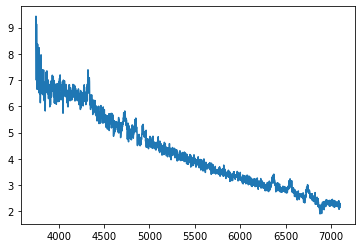

In [5]:
hdul = fits.open('fwctb.0164_WDJ0035m1225_400m1.fits')
typeEx = hdul[0].data
typeEx
typeEx2 = hdul[1].data
typeEx2






wave0035_1 = typeEx
flux0035_1 = typeEx2


S0035_1 = Spectrum1D(flux=flux0035_1*u.Jy, spectral_axis=wave0035_1*u.AA)
g1_fit = fit_generic_continuum(S0035_1)
y_continuum_fitted = g1_fit(wave0035_1*u.AA)
S0035_1 = S0035_1 / y_continuum_fitted


hdul = fits.open('fwctb.0160_WDJ0035m1225_400m1.fits')
typeEx = hdul[0].data
typeEx
typeEx2 = hdul[1].data
typeEx2
plt.plot(typeEx, typeEx2)
wave0035_2 = typeEx
flux0035_2 = typeEx2


S0035_2 = Spectrum1D(flux=flux0035_2*u.Jy, spectral_axis=wave0035_2*u.AA)
g1_fit = fit_generic_continuum(S0035_2)
y_continuum_fitted = g1_fit(wave0035_2*u.AA)
S0035_2 = S0035_2 / y_continuum_fitted

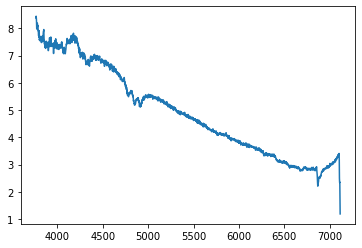

In [6]:
hdul = fits.open('WDJ1430m5623_p1.fits')
typeEx = hdul[0].data
typeEx
typeEx2 = hdul[1].data
typeEx2

wave1430_1 = typeEx
flux1430_1 = typeEx2


S1430_1 = Spectrum1D(flux=flux1430_1*u.Jy, spectral_axis=wave1430_1*u.AA)
g1_fit = fit_generic_continuum(S1430_1)
y_continuum_fitted = g1_fit(wave1430_1*u.AA)
S1430_1 = S1430_1 / y_continuum_fitted


hdul = fits.open('WDJ1430m5623_p6.fits')
typeEx = hdul[0].data
typeEx
typeEx2 = hdul[1].data
typeEx2
plt.plot(typeEx, typeEx2)
wave1430_2 = typeEx
flux1430_2 = typeEx2


S1430_2 = Spectrum1D(flux=flux1430_2*u.Jy, spectral_axis=wave1430_2*u.AA)
g1_fit = fit_generic_continuum(S1430_2)
y_continuum_fitted = g1_fit(wave1430_2*u.AA)
S1430_2 = S1430_2 / y_continuum_fitted

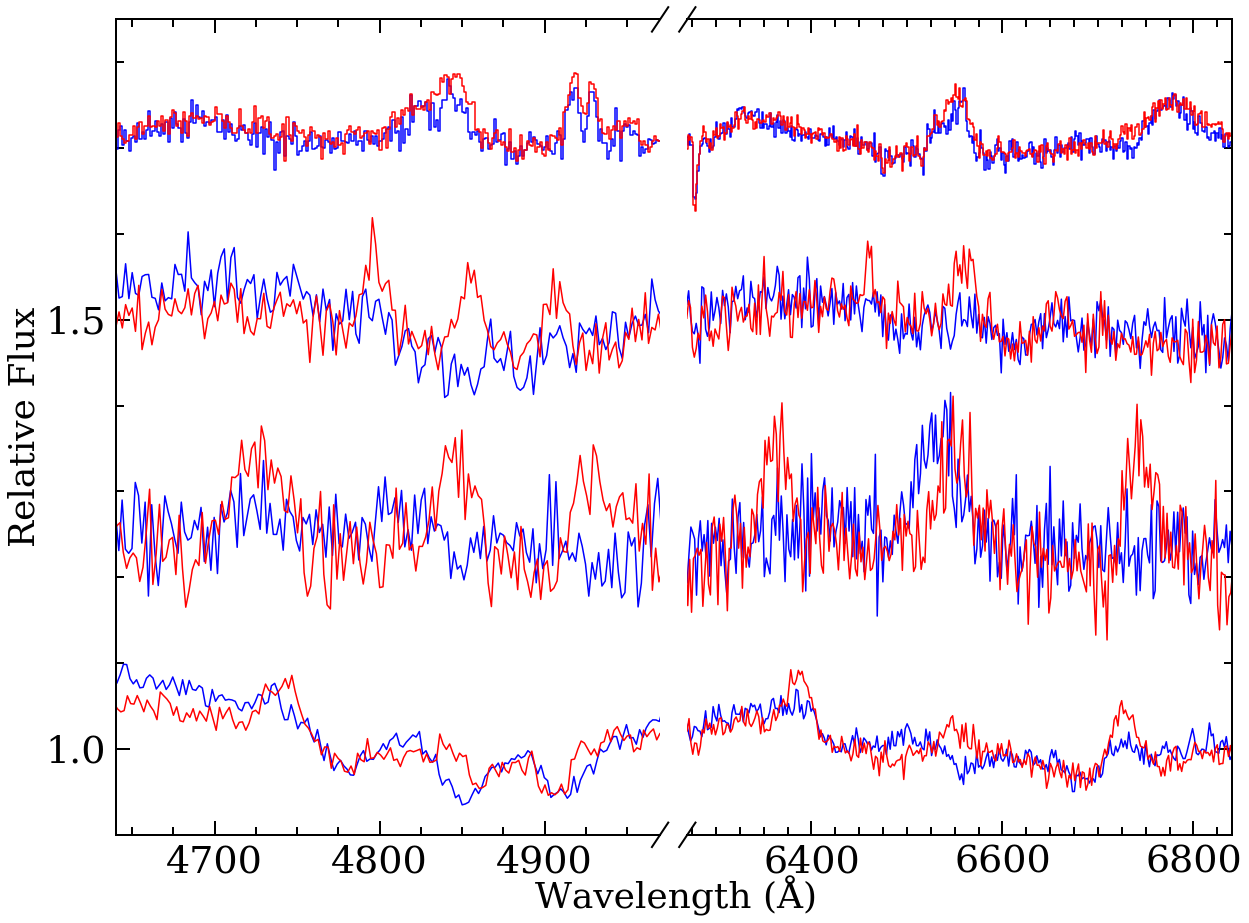

In [203]:
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rc('axes', linewidth=2)
f,(ax,ax2) = plt.subplots(1,2,gridspec_kw={'hspace': 0.15, 'wspace': 0.05},sharey=True, facecolor='w', figsize=(20,15))
ax.plot(BlueXGD356, BlueYGD356[0]+0.7, c='b')
ax.plot(BlueXGD356, BlueYGD356[5]+0.7, c='r')

ax2.plot(RedXGD356, RedYGD356[0]+0.7, c='b')
ax2.plot(RedXGD356, RedYGD356[5]+0.7, c='r')




idxStart = find_nearest(wavelsReding,4650)
idxEnd = find_nearest(wavelsReding,4950)

ax.plot(phase15.spectral_axis, phase15.flux/np.median(phase15.flux[idxStart:idxEnd])+0.5, c='b')
ax.plot(phase159.spectral_axis, phase159.flux/np.median(phase159.flux[idxStart:idxEnd])+0.5, c='r')

idxStart = find_nearest(wavelsReding,6300)
idxEnd = find_nearest(wavelsReding,6800)

ax2.plot(phase15.spectral_axis, phase15.flux/np.median(phase15.flux[idxStart:idxEnd])+0.5, c='b')
ax2.plot(phase159.spectral_axis, phase159.flux/np.median(phase159.flux[idxStart:idxEnd])+0.5, c='r')

idxStart = find_nearest(wave0035_1,4650)
idxEnd = find_nearest(wave0035_1,4950)
ax.plot(S0035_1.spectral_axis, S0035_1.flux/np.median(S0035_1.flux[idxStart:idxEnd])+0.25, c='b')
ax.plot(S0035_2.spectral_axis, S0035_2.flux/np.median(S0035_2.flux[idxStart:idxEnd])+0.25, c='r')

idxStart = find_nearest(wave0035_1,6300)
idxEnd = find_nearest(wave0035_1,6800)
ax2.plot(S0035_1.spectral_axis, S0035_1.flux/np.median(S0035_1.flux[idxStart:idxEnd])+0.25, c='b')
ax2.plot(S0035_2.spectral_axis, S0035_2.flux/np.median(S0035_2.flux[idxStart:idxEnd])+0.25, c='r')



idxStart = find_nearest(wave1430_1,4650)
idxEnd = find_nearest(wave1430_1,4950)

ax.plot(S1430_2.spectral_axis, S1430_2.flux/np.median(S1430_2.flux[idxStart:idxEnd])+0., c='b')
ax.plot(S1430_1.spectral_axis, S1430_1.flux/np.median(S1430_1.flux[idxStart:idxEnd])+0., c='r')

idxStart = find_nearest(wave1430_1,6300)
idxEnd = find_nearest(wave1430_1,6800)

ax2.plot(S1430_2.spectral_axis, S1430_2.flux/np.median(S1430_2.flux[idxStart:idxEnd])+0, c='b')
ax2.plot(S1430_1.spectral_axis, S1430_1.flux/np.median(S1430_1.flux[idxStart:idxEnd])+0, c='r')


#ax.plot(wave0035_2, flux0035_2/4, c='k')
#ax2.plot(wave0035_2, flux0035_2/2)

ax.set_xlim(4640,4970)
ax2.set_xlim(6270,6840)  
ax.set_ylim(0.9,1.85)
ax2.set_ylim(0.9,1.85)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs, lw=2)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs, lw=2)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs, lw=2)
ax2.plot((-d,+d), (-d,+d), **kwargs, lw=2)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=14)
ax.tick_params(which='minor', length=8)
ax2.tick_params(which='both', width=4)
ax2.tick_params(which='major', length=14)
ax2.tick_params(which='minor', length=8)
ax.tick_params(labelsize=23)
ax2.tick_params(labelsize=23)
ax.set_xlabel(r"Wavelength (Å)", fontsize=36)
ax.set_ylabel('Relative Flux', fontsize=36)
ax.xaxis.set_label_coords(1.03, -0.05)


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(0.125))

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.tick_params(which='minor', length=8,direction="in")

ax.tick_params(which='both', width=2,direction='in',pad=10)

ax.tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
ax.tick_params(labelsize=38)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('left')


ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax2.xaxis.set_minor_locator(MultipleLocator(25))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))

ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.tick_params(which='minor', length=8,direction="in")

ax2.tick_params(which='both', width=2,direction='in',pad=10)

ax2.tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
ax2.tick_params(labelsize=38)

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('right')


bboxx = transforms.Bbox([[0.9, 0.7], [18.2, 13.4]])
ax2.tick_params(labelright=False)
#plt.savefig('12800Specv1.pdf',bbox_inches=bboxx)
#RCor 1.4646344367729398
#BCor 1.3110264348661076

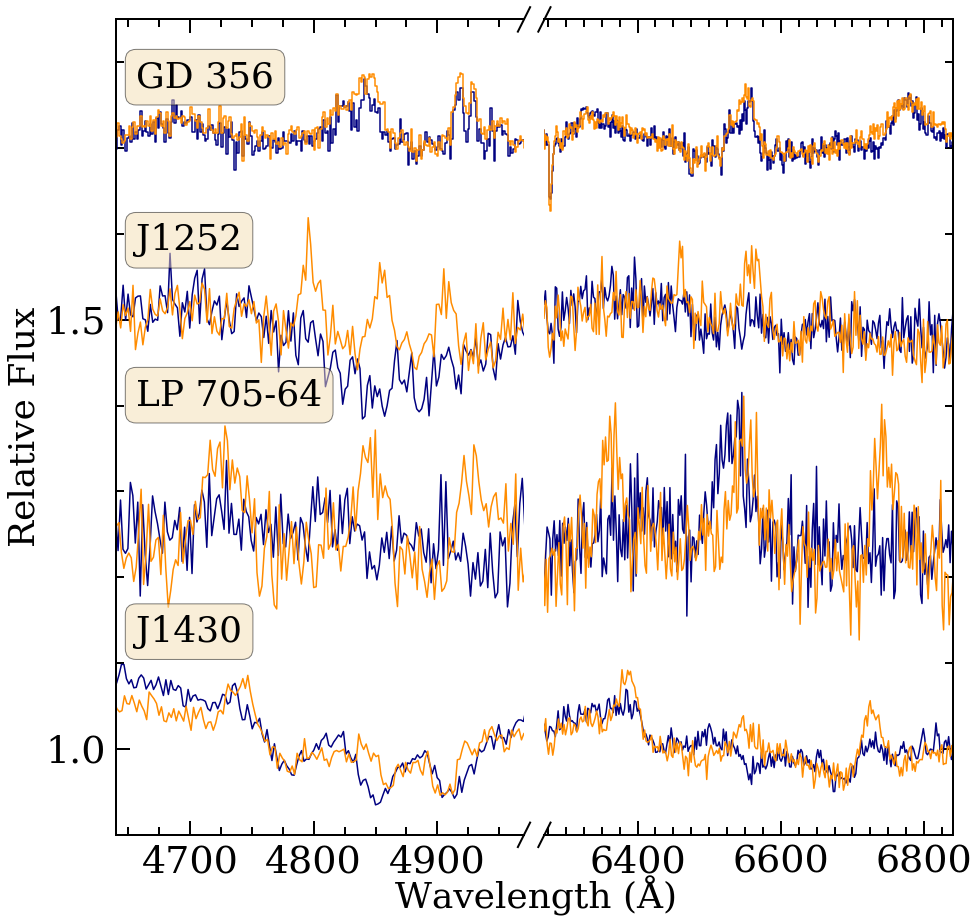

In [12]:
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rc('axes', linewidth=2)
colorHot = 'darkorange'
colorCold = 'navy'

f,(ax,ax2) = plt.subplots(1,2,gridspec_kw={'hspace': 0.15, 'wspace': 0.05},sharey=True, facecolor='w', figsize=(15,15))
ax.plot(BlueXGD356, BlueYGD356[0]+0.7, c=colorCold)
ax.plot(BlueXGD356, BlueYGD356[5]+0.7, c=colorHot)

ax2.plot(RedXGD356, RedYGD356[0]+0.7, c=colorCold)
ax2.plot(RedXGD356, RedYGD356[5]+0.7, c=colorHot)




idxStart = find_nearest(wavelsReding,4650)
idxEnd = find_nearest(wavelsReding,4950)

ax.plot(phase15.spectral_axis, phase15.flux/np.median(phase15.flux[idxStart:idxEnd])+0.475, c=colorCold)
ax.plot(phase159.spectral_axis, phase159.flux/np.median(phase159.flux[idxStart:idxEnd])+0.5, c=colorHot)

idxStart = find_nearest(wavelsReding,6300)
idxEnd = find_nearest(wavelsReding,6800)

ax2.plot(phase15.spectral_axis, phase15.flux/np.median(phase15.flux[idxStart:idxEnd])+0.5, c=colorCold)
ax2.plot(phase159.spectral_axis, phase159.flux/np.median(phase159.flux[idxStart:idxEnd])+0.5, c=colorHot)

idxStart = find_nearest(wave0035_1,4650)
idxEnd = find_nearest(wave0035_1,4950)
ax.plot(S0035_1.spectral_axis, S0035_1.flux/np.median(S0035_1.flux[idxStart:idxEnd])+0.25, c=colorCold)
ax.plot(S0035_2.spectral_axis, S0035_2.flux/np.median(S0035_2.flux[idxStart:idxEnd])+0.25, c=colorHot)

idxStart = find_nearest(wave0035_1,6300)
idxEnd = find_nearest(wave0035_1,6800)
ax2.plot(S0035_1.spectral_axis, S0035_1.flux/np.median(S0035_1.flux[idxStart:idxEnd])+0.25, c=colorCold)
ax2.plot(S0035_2.spectral_axis, S0035_2.flux/np.median(S0035_2.flux[idxStart:idxEnd])+0.25, c=colorHot)



idxStart = find_nearest(wave1430_1,4650)
idxEnd = find_nearest(wave1430_1,4950)

ax.plot(S1430_2.spectral_axis, S1430_2.flux/np.median(S1430_2.flux[idxStart:idxEnd])+0., c=colorCold)
ax.plot(S1430_1.spectral_axis, S1430_1.flux/np.median(S1430_1.flux[idxStart:idxEnd])+0., c=colorHot)

idxStart = find_nearest(wave1430_1,6300)
idxEnd = find_nearest(wave1430_1,6800)

ax2.plot(S1430_2.spectral_axis, S1430_2.flux/np.median(S1430_2.flux[idxStart:idxEnd])+0, c=colorCold)
ax2.plot(S1430_1.spectral_axis, S1430_1.flux/np.median(S1430_1.flux[idxStart:idxEnd])+0, c=colorHot)


#ax.plot(wave0035_2, flux0035_2/4, c='k')
#ax2.plot(wave0035_2, flux0035_2/2)

ax.set_xlim(4640,4970)
ax2.set_xlim(6270,6840)  
ax.set_ylim(0.9,1.85)
ax2.set_ylim(0.9,1.85)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs, lw=2)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs, lw=2)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs, lw=2)
ax2.plot((-d,+d), (-d,+d), **kwargs, lw=2)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=14)
ax.tick_params(which='minor', length=8)
ax2.tick_params(which='both', width=4)
ax2.tick_params(which='major', length=14)
ax2.tick_params(which='minor', length=8)
ax.tick_params(labelsize=23)
ax2.tick_params(labelsize=23)
ax.set_xlabel(r"Wavelength (Å)", fontsize=36)
ax.set_ylabel('Relative Flux', fontsize=36)
ax.xaxis.set_label_coords(1.03, -0.05)


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(0.125))

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.tick_params(which='minor', length=8,direction="in")

ax.tick_params(which='both', width=2,direction='in',pad=10)

ax.tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
ax.tick_params(labelsize=38)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('left')


ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax2.xaxis.set_minor_locator(MultipleLocator(25))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))

ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.tick_params(which='minor', length=8,direction="in")

ax2.tick_params(which='both', width=2,direction='in',pad=10)

ax2.tick_params(which='major', length=14,direction='in')

#axs[1].set_xticklabels([])
ax2.tick_params(labelsize=38)

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('right')
textstr = 'GD 356'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax2.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=36,
        verticalalignment='top', bbox=props)




textstr = 'J1252'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax2.text(0.05, 0.75, textstr, transform=ax.transAxes, fontsize=36,
        verticalalignment='top', bbox=props)


textstr = 'LP 705-64'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax2.text(0.05, 0.56, textstr, transform=ax.transAxes, fontsize=36,
        verticalalignment='top', bbox=props)


textstr = 'J1430'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax2.text(0.05, 0.27, textstr, transform=ax.transAxes, fontsize=36,
        verticalalignment='top', bbox=props)


bboxx = transforms.Bbox([[0.3, 0.7], [13.8, 13.4]])
ax2.tick_params(labelright=False)
#plt.savefig('12800Specv3.pdf',bbox_inches=bboxx)
#RCor 1.4646344367729398
#BCor 1.3110264348661076



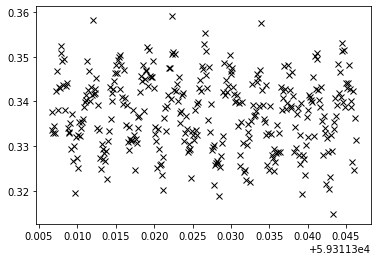

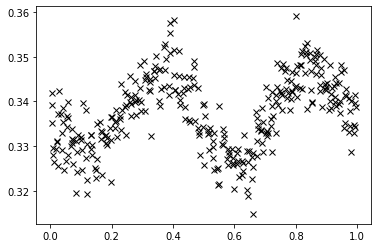

In [3]:
hdul = fits.open('/home/nwal/Desktop/ucam/sdssj1252_1.fits')
data = hdul[1].data
time1252_1 = data.field('MJD')
flux1252_1 = data.field('counts_1')/data.field('counts_2')
fluxE1252_1 = flux1252_1*np.sqrt(((data.field('countse_1') / data.field('counts_1'))**2)+((data.field('countse_2') / data.field('counts_2'))**2))


plt.plot(time1252_1, flux1252_1, 'kx')
plt.show()
phases_1 = foldMeth(time1252_1, 634/60/60/24)
sortIndi = np.argsort(phases_1)
phasesSorted_1 = phases_1[sortIndi]
fluxSorted_1 = flux1252_1[sortIndi]
plt.plot(phasesSorted_1, fluxSorted_1, 'kx')

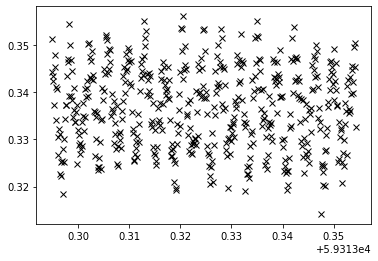

<ErrorbarContainer object of 3 artists>

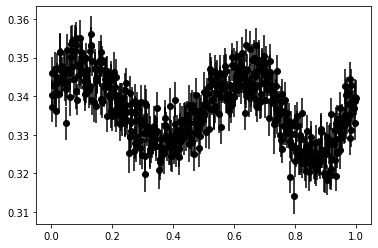

In [4]:
hdul = fits.open('/home/nwal/Desktop/ucam/sdssj1252_2.fits')
data = hdul[1].data
time1252_2 = data.field('MJD')
flux1252_2 = data.field('counts_1')/data.field('counts_2')
fluxE1252_2 = flux1252_2*np.sqrt(((data.field('countse_1') / data.field('counts_1'))**2)+((data.field('countse_2') / data.field('counts_2'))**2))


plt.plot(time1252_2, flux1252_2, 'kx')
plt.show()
phases_2 = foldMeth(time1252_2, 634/60/60/24)
sortIndi = np.argsort(phases_2)
phasesSorted_2 = phases_2[sortIndi]
fluxSorted_2 = flux1252_2[sortIndi]
fluxESorted_2 = fluxE1252_2[sortIndi]
plt.errorbar(phasesSorted_2, fluxSorted_2, yerr=fluxESorted_2,ls = '', marker='o', c='k')

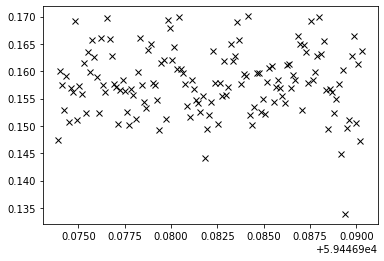

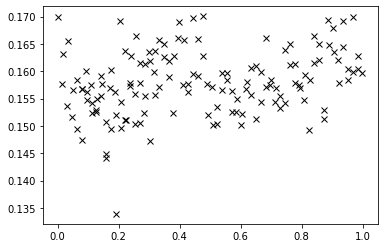

In [5]:
hdul = fits.open('/home/nwal/Desktop/ucam/sdssj1252_3.fits')
data = hdul[1].data
time1252 = data.field('MJD')
flux1252 = data.field('counts_1')/data.field('counts_2')
plt.plot(time1252, flux1252, 'kx')
plt.show()
phases = foldMeth(time1252, 634/60/60/24)
sortIndi = np.argsort(phases)
phasesSorted = phases[sortIndi]
fluxSorted = flux1252[sortIndi]
plt.plot(phasesSorted, fluxSorted, 'kx')

316.74715596330276


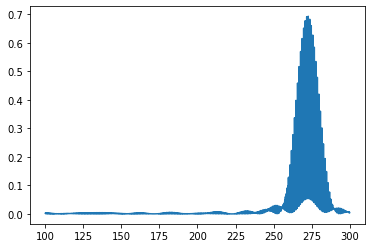

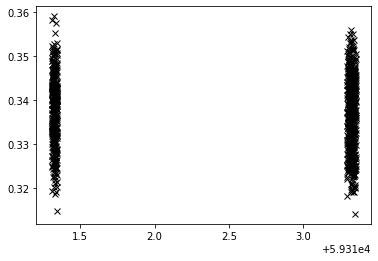

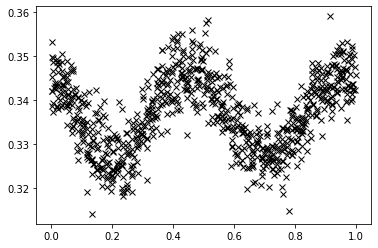

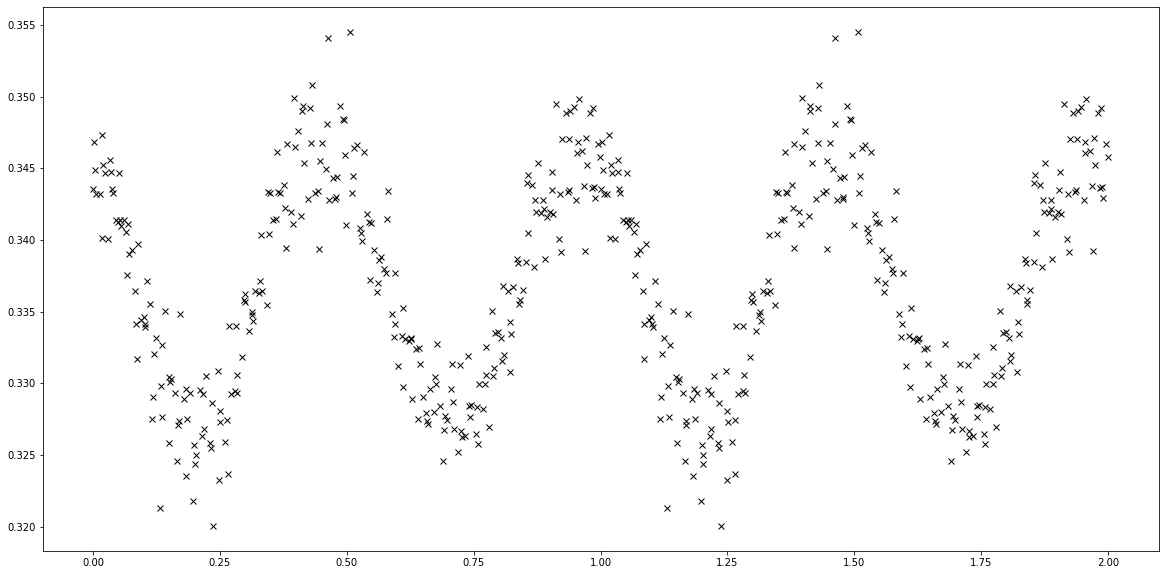

In [6]:
time1252 = np.concatenate((time1252_1,time1252_2))
flux1252 = np.concatenate((flux1252_1, flux1252_2))

freq = np.linspace(100, 300, 1000)
powerPl = LombScargle(time1252,flux1252).power(freq)
plt.plot(freq, powerPl)
print(24*60*60*(1/freq[np.argmax(powerPl)]))
plt.show()

plt.plot(time1252, flux1252, 'kx')
plt.show()
phases = foldMeth(time1252, (316.74715596330276*2)/60/60/24)
sortIndi = np.argsort(phases)
phasesSorted = phases[sortIndi]
fluxSorted = flux1252[sortIndi]
plt.plot(phasesSorted, fluxSorted, 'kx')
plt.show()

npoint = 3
phasesSortedMean = np.nanmean(np.pad(phasesSorted.astype(float), (0, npoint - phasesSorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
fluxSortedMean =np.nanmean(np.pad(fluxSorted.astype(float), (0, npoint - fluxSorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
plt.figure(figsize=(20,10))
plt.plot(phasesSortedMean, fluxSortedMean, 'kx')
plt.plot(phasesSortedMean+1, fluxSortedMean, 'kx')

316.9798016893132


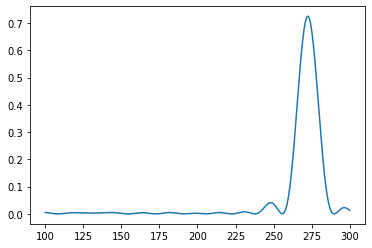

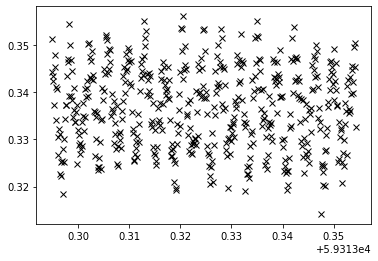

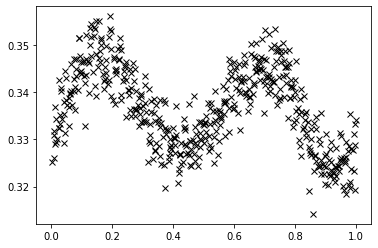

<ErrorbarContainer object of 3 artists>

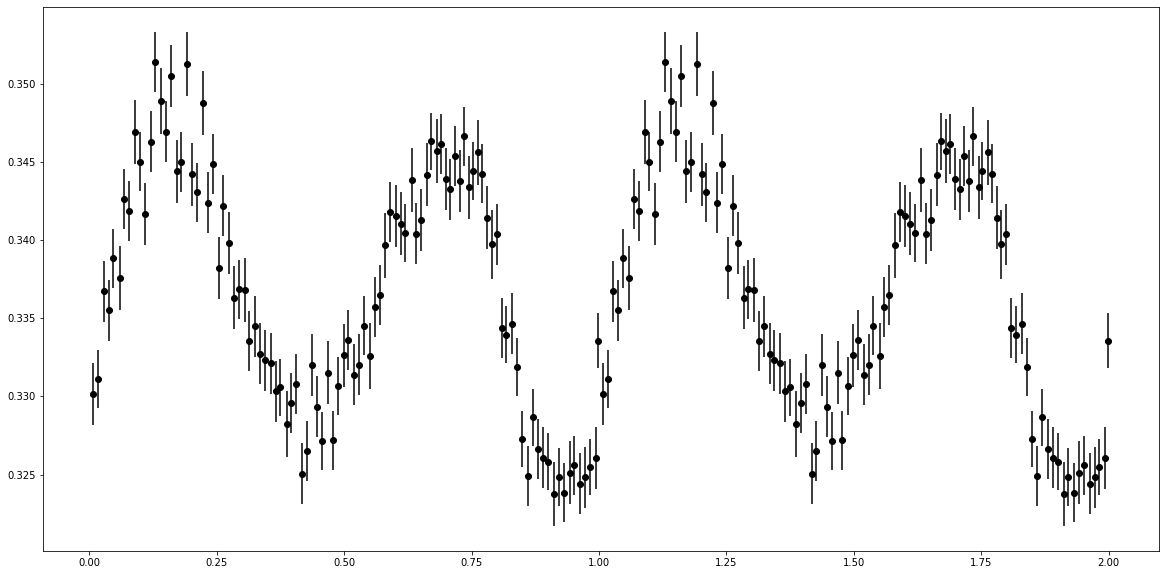

In [7]:
freq = np.linspace(100, 300, 1000)
powerPl = LombScargle(time1252_2,flux1252_2).power(freq)
plt.plot(freq, powerPl)
print(24*60*60*(1/freq[np.argmax(powerPl)]))
plt.show()

plt.plot(time1252_2, flux1252_2, 'kx')
plt.show()
phases = foldMeth(time1252_2, (316.9798016893132*2)/60/60/24)
sortIndi = np.argsort(phases)
phasesSorted = phases[sortIndi]
fluxSorted = flux1252_2[sortIndi]
fluxESorted = fluxE1252_2[sortIndi]
plt.plot(phasesSorted, fluxSorted, 'kx')
plt.show()

npoint = 5
phasesSortedMean = np.nanmean(np.pad(phasesSorted.astype(float), (0, npoint - phasesSorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
fluxSortedMean = np.nanmean(np.pad(fluxSorted.astype(float), (0, npoint - fluxSorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
fluxESortedMean = np.nanmean(np.pad(fluxESorted.astype(float), (0, npoint - fluxESorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
fluxESortedMean = fluxESortedMean / np.sqrt(npoint)
plt.figure(figsize=(20,10))
plt.errorbar(phasesSortedMean, fluxSortedMean, yerr=fluxESortedMean, c='k', ls= '', marker='o')
plt.errorbar(phasesSortedMean+1, fluxSortedMean, yerr=fluxESortedMean, c= 'k', ls= '', marker='o')

In [8]:
phasePlot1252 = phasesSortedMean
fluxPlot1252 = fluxSortedMean
fluxEPlot1252 = fluxESortedMean

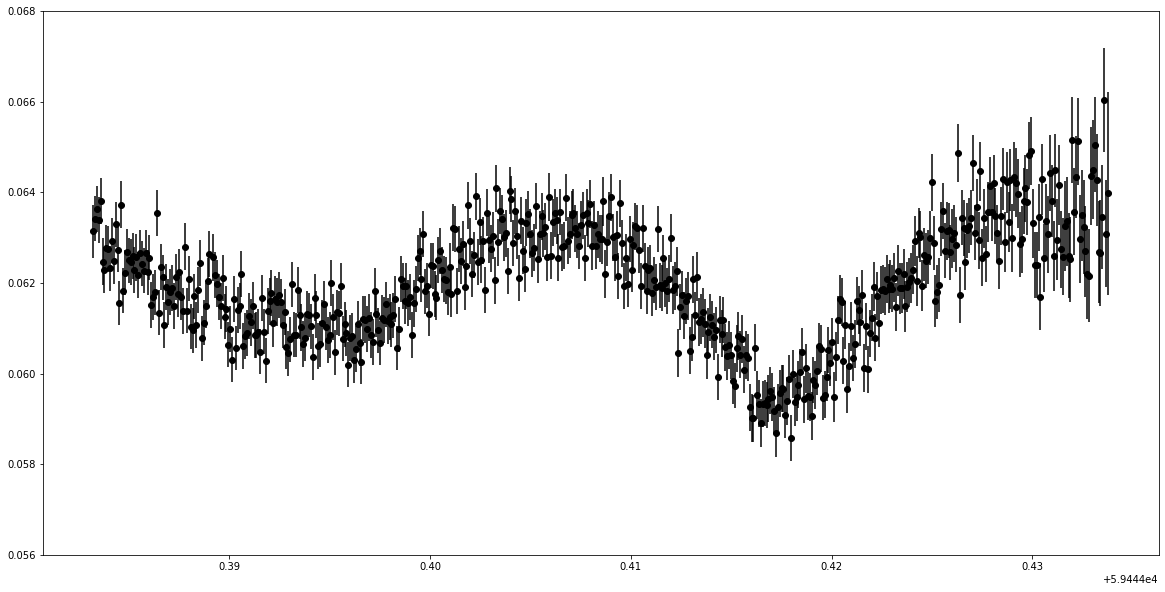

In [9]:
hdul = fits.open('/home/nwal/Desktop/ucam/wdj0035_1.fits')
data = hdul[1].data
time0035_1 = data.field('MJD')
flux0035_1 = data.field('counts_1')/data.field('counts_2')
fluxE0035_1 = flux0035_1*np.sqrt(((data.field('countse_1') / data.field('counts_1'))**2)+((data.field('countse_2') / data.field('counts_2'))**2))

plt.figure(figsize=(20,10))
plt.errorbar(time0035_1, flux0035_1, yerr=fluxE0035_1, c='k', ls='',marker='o')
plt.ylim(0.056,0.068)
plt.show()


#phases_1 = foldMeth(time1252_2, 634/60/60/24)
#sortIndi = np.argsort(phases_2)
#phasesSorted_2 = phases_2[sortIndi]
#fluxSorted_2 = flux1252_2[sortIndi]
#fluxESorted_2 = fluxE1252_2[sortIndi]
#plt.errorbar(phasesSorted_2, fluxSorted_2, yerr=fluxESorted_2,ls = '', marker='o', c='k')

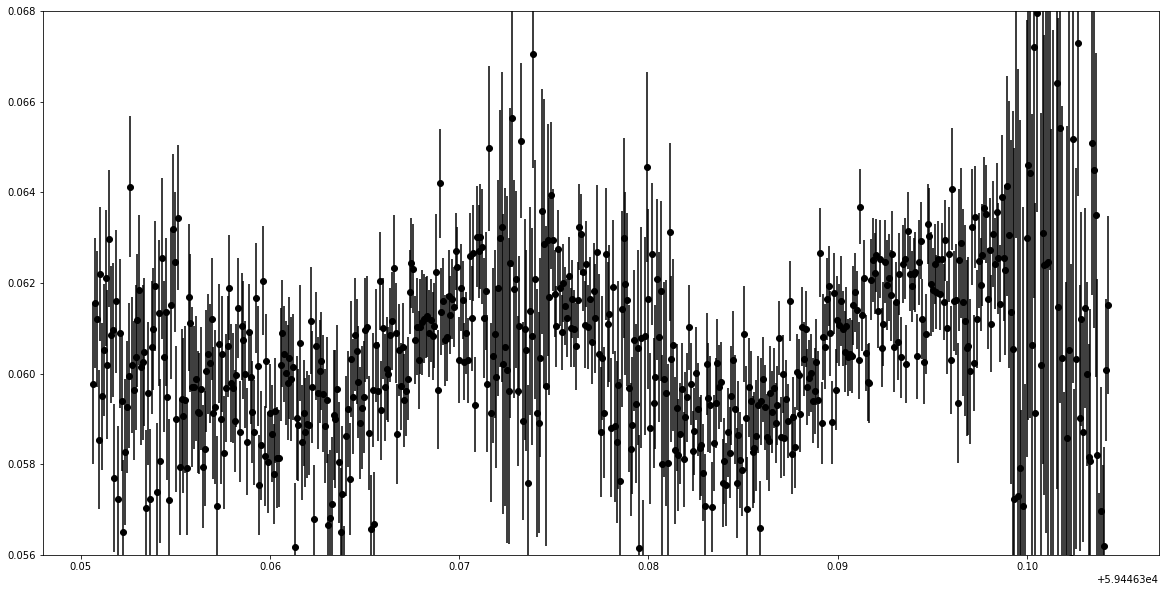

In [10]:
hdul = fits.open('/home/nwal/Desktop/ucam/wdj0035_2.fits')
data = hdul[1].data
time0035_2 = data.field('MJD')
flux0035_2 = data.field('counts_1')/data.field('counts_2')
fluxE0035_2 = flux0035_2*np.sqrt(((data.field('countse_1') / data.field('counts_1'))**2)+((data.field('countse_2') / data.field('counts_2'))**2))

plt.figure(figsize=(20,10))
plt.errorbar(time0035_2, flux0035_2, yerr=fluxE0035_2, c='k', ls='',marker='o')
plt.ylim(0.056,0.068)
plt.show()


#phases_1 = foldMeth(time1252_2, 634/60/60/24)
#sortIndi = np.argsort(phases_2)
#phasesSorted_2 = phases_2[sortIndi]
#fluxSorted_2 = flux1252_2[sortIndi]
#fluxESorted_2 = fluxE1252_2[sortIndi]
#plt.errorbar(phasesSorted_2, fluxSorted_2, yerr=fluxESorted_2,ls = '', marker='o', c='k')

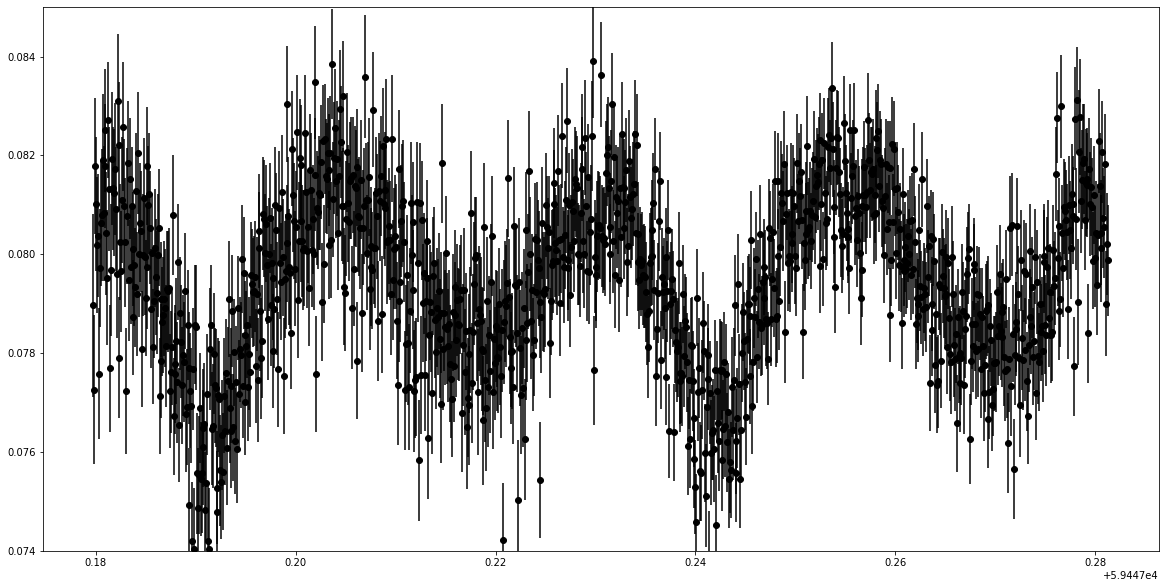

In [11]:
hdul = fits.open('/home/nwal/Desktop/ucam/wdj0035_3.fits')
data = hdul[1].data
time0035_3 = data.field('MJD')
flux0035_3 = data.field('counts_1')/data.field('counts_2')
fluxE0035_3 = flux0035_3*np.sqrt(((data.field('countse_1') / data.field('counts_1'))**2)+((data.field('countse_2') / data.field('counts_2'))**2))

plt.figure(figsize=(20,10))
plt.errorbar(time0035_3, flux0035_3, yerr=fluxE0035_3, c='k', ls='',marker='o')
plt.ylim(0.074,0.085)
plt.show()


#phases_1 = foldMeth(time1252_2, 634/60/60/24)
#sortIndi = np.argsort(phases_2)
#phasesSorted_2 = phases_2[sortIndi]
#fluxSorted_2 = flux1252_2[sortIndi]
#fluxESorted_2 = fluxE1252_2[sortIndi]
#plt.errorbar(phasesSorted_2, fluxSorted_2, yerr=fluxESorted_2,ls = '', marker='o', c='k')

0.024282578397466392


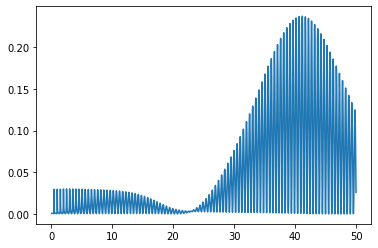

In [12]:
time0035 = np.concatenate((time0035_1, time0035_2))
flux0035 = np.concatenate((flux0035_1/np.median(flux0035_1), flux0035_2/np.median(flux0035_2)))
fluxE0035 = np.concatenate((fluxE0035_1, fluxE0035_2))


freq = np.linspace(0.1, 50, 10000)
powerPl = LombScargle(time0035,flux0035).power(freq)
plt.plot(freq, powerPl)
print((1/freq[np.argmax(powerPl)]))

In [79]:
0.7992805755395684/24*2

0.06660671462829737

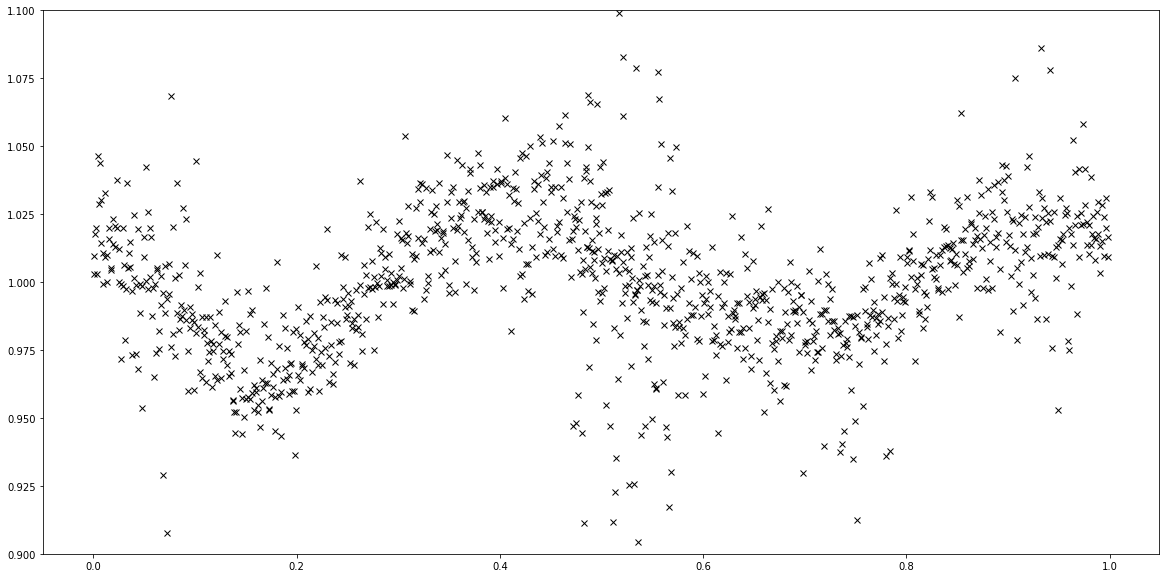

In [13]:
phases = foldMeth(time0035, 1/40.671983*2)
sortIndi = np.argsort(phases)
phasesSorted = phases[sortIndi]
fluxSorted = flux0035[sortIndi]
fluxESorted = fluxE0035[sortIndi]
plt.figure(figsize=(20,10))
plt.ylim(0.9,1.1)
plt.plot(phasesSorted, fluxSorted, 'kx')
plt.show()


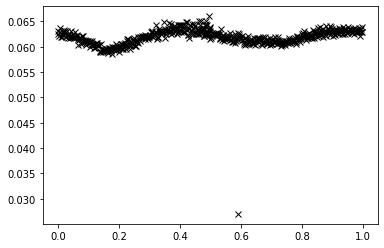

<ErrorbarContainer object of 3 artists>

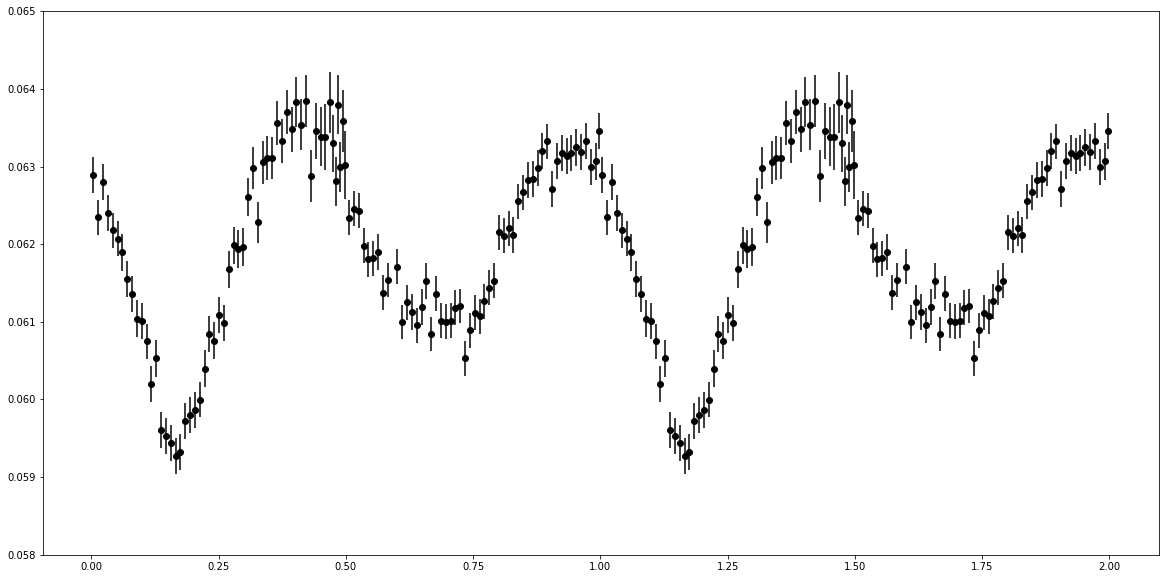

In [14]:
phases = foldMeth(time0035_1,  1/40.671983*2)
sortIndi = np.argsort(phases)
phasesSorted = phases[sortIndi]
fluxSorted = flux0035_1[sortIndi]
fluxESorted = fluxE0035_1[sortIndi]
plt.plot(phasesSorted, fluxSorted, 'kx')
plt.show()

npoint = 5
phasesSortedMean = np.nanmean(np.pad(phasesSorted.astype(float), (0, npoint - phasesSorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
fluxSortedMean = np.nanmean(np.pad(fluxSorted.astype(float), (0, npoint - fluxSorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
fluxESortedMean = np.nanmean(np.pad(fluxESorted.astype(float), (0, npoint - fluxESorted.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
fluxESortedMean = fluxESortedMean / np.sqrt(npoint)
plt.figure(figsize=(20,10))
plt.errorbar(phasesSortedMean, fluxSortedMean, yerr=fluxESortedMean, c='k', ls= '', marker='o')
plt.ylim(0.058, 0.065)
plt.errorbar(phasesSortedMean+1, fluxSortedMean, yerr=fluxESortedMean, c= 'k', ls= '', marker='o')

In [15]:
phasePlot0035 = phasesSortedMean
fluxPlot0035 = fluxSortedMean
fluxEPlot0035 = fluxESortedMean

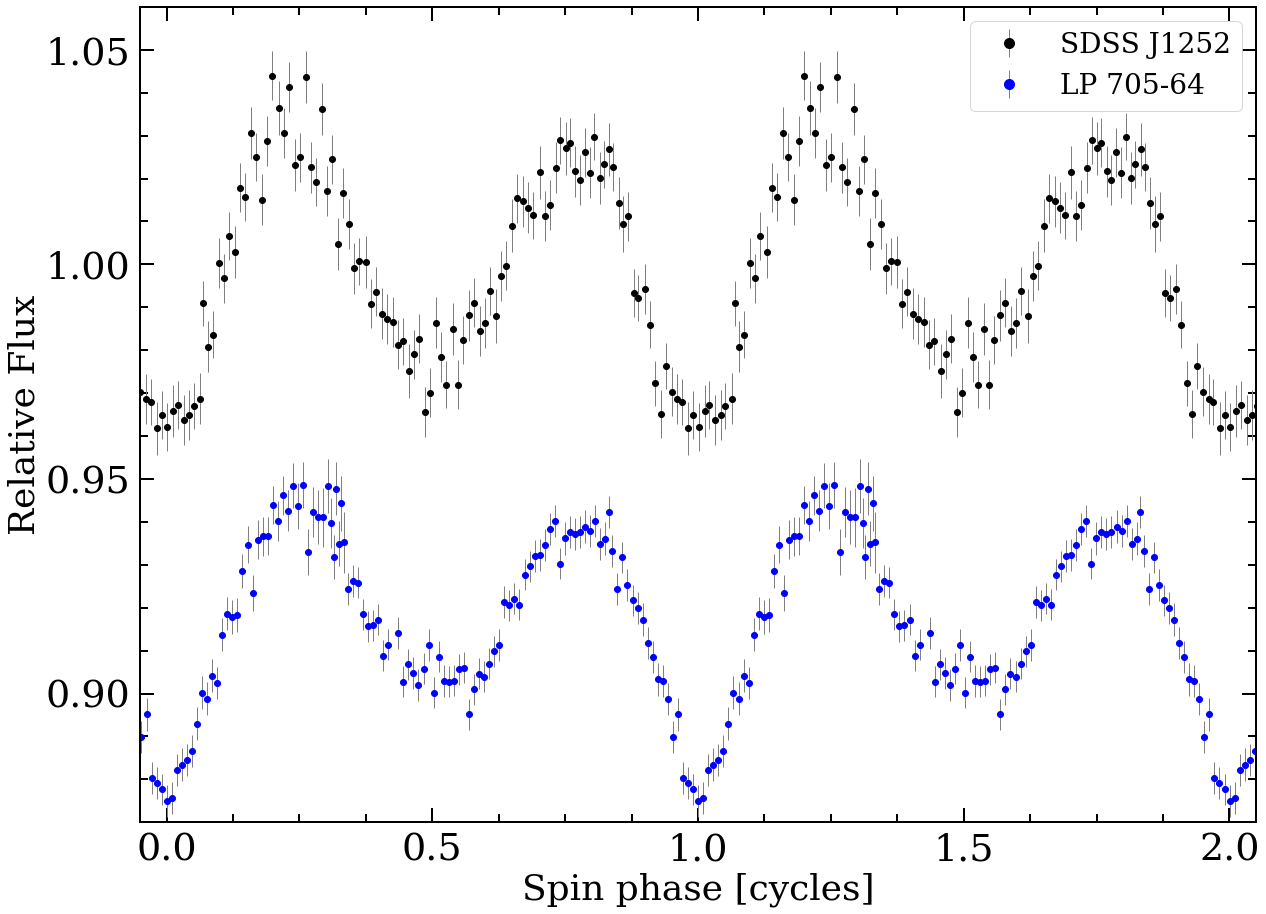

In [16]:

rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,
                        gridspec_kw={'hspace': 0., 'wspace': 0}, figsize=(20,15))
#phasePlot1252
offset = -0.235
offsetGlobal = 0.07
yoff = -0.08
axs.errorbar(phasePlot0035+offset+offsetGlobal, (fluxPlot0035/np.median(fluxPlot0035))+yoff, yerr=fluxEPlot0035/np.median(fluxPlot0035), c='b', lw=1, marker='o',ecolor='grey', ls = '')
axs.errorbar(phasePlot0035+1+offset+offsetGlobal, (fluxPlot0035/np.median(fluxPlot0035))+yoff, yerr=fluxEPlot0035/np.median(fluxPlot0035), c='b', lw=1, marker='o',ecolor='grey', ls = '')
axs.errorbar(phasePlot0035+2+offset+offsetGlobal, (fluxPlot0035/np.median(fluxPlot0035))+yoff, yerr=fluxEPlot0035/np.median(fluxPlot0035), c='b', lw=1, marker='o',ecolor='grey', ls = '')

axs.errorbar(phasePlot1252+offsetGlobal-1, fluxPlot1252/np.median(fluxPlot1252), yerr=fluxEPlot1252/np.median(fluxPlot1252), c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs.errorbar(phasePlot1252+offsetGlobal, fluxPlot1252/np.median(fluxPlot1252), yerr=fluxEPlot1252/np.median(fluxPlot1252), c='k', lw=1, marker='o',ecolor='grey', ls = '')
axs.errorbar(phasePlot1252+1+offsetGlobal, fluxPlot1252/np.median(fluxPlot1252), yerr=fluxEPlot1252/np.median(fluxPlot1252), c='k', lw=1, marker='o',ecolor='grey', ls = '')


xlimits = axs.set_xlim()
axs.errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='k', lw=1, marker='o',ecolor='grey', ls = '', label='SDSS J1252')
axs.errorbar([-0.06,-0.06], [0,0], yerr=[0.01,0.01],ms=10, c='b', lw=1, marker='o',ecolor='grey', ls = '', label='LP 705-64')


axs.set_xlim(xlimits)


#axs[0].legend(prop={'size': 30})
#axs[1].legend(prop={'size': 30},loc='upper right')
#axs[2].legend(prop={'size': 30})
axs.set_xlabel("Spin phase [cycles]", fontsize=36)
axs.set_ylabel('Relative Flux', fontsize=36)

axs.set_ylim(0.87,1.06)
axs.set_xlim(-0.05,2.05)

axs.xaxis.set_minor_locator(AutoMinorLocator())

axs.xaxis.set_minor_locator(MultipleLocator(0.125))
axs.yaxis.set_minor_locator(MultipleLocator(0.01))
axs.yaxis.set_major_locator(MultipleLocator(0.05))
axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.tick_params(which='minor', length=8,direction="in")

axs.tick_params(which='both', width=2,direction='in',pad=10)

axs.tick_params(which='major', length=14,direction='in')

#axs.set_xticklabels([])
axs.tick_params(labelsize=38)

axs.xaxis.set_ticks_position('both')
axs.legend(prop={'size': 28})
axs.yaxis.set_ticks_position('both')
bboxx = transforms.Bbox([[0.62, 0.66], [18.1, 13.3]])

#plt.savefig('12800LCv1.pdf',bbox_inches=bboxx)

plt.show()

In [17]:
t1s = np.concatenate((phasePlot0035+offset+offsetGlobal, phasePlot0035+1+offset+offsetGlobal, phasePlot0035+2+offset+offsetGlobal))

t2s = np.concatenate((phasePlot1252+offsetGlobal-1, phasePlot1252+offsetGlobal, phasePlot1252+1+offsetGlobal))

f1s = np.concatenate(((fluxPlot0035/np.median(fluxPlot0035))+yoff,(fluxPlot0035/np.median(fluxPlot0035))+yoff,(fluxPlot0035/np.median(fluxPlot0035))+yoff))

f2s = np.concatenate((fluxPlot1252/np.median(fluxPlot1252), fluxPlot1252/np.median(fluxPlot1252), fluxPlot1252/np.median(fluxPlot1252)))

e1s = np.concatenate((fluxEPlot0035/np.median(fluxPlot0035), fluxEPlot0035/np.median(fluxPlot0035), fluxEPlot0035/np.median(fluxPlot0035)))

e2s = np.concatenate((fluxEPlot1252/np.median(fluxPlot1252), fluxEPlot1252/np.median(fluxPlot1252), fluxEPlot1252/np.median(fluxPlot1252)))

In [18]:
dat = np.vstack((t1s, f1s, e1s))
dat = dat.T
np.savetxt('dahe0035.dat', dat, delimiter = '\t')


dat = np.vstack((t2s, f2s, e2s))
dat = dat.T
np.savetxt('dahe1252.dat', dat, delimiter = '\t')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 327 and the array at index 1 has size 300